# Coronavirus Disease (COVID-19) Situation Reports – WHO/Devakumar kp

### Aprendizagem Supervisionada

Ana Margarida Ruivo Loureiro - 201705749

João Martins


João Cardoso

# Abstract

# Introdução 

# Dataset

O nosso dataset providencia-nos dados geográficos e contagem de casos confirmados, óbitos e recuperados do Covid-19 num periodo de  4 meses (22 de janeiro de 2020 a 5 de maio de 2020) em vários países. O objetivo será extrair informação dos dados de forma a podermos construir um modelo de regressão capaz de prever as contagens tendo por base os fatores disponiveis (localização geográfica, dia e contagem anterior). Assim sendo é necessário partir dos dados iniciais e proceder a um pré-processamento para tratar os dados e poder-se então utlizar os algoritmos de regressão que pretendemos utilizar.

### Variáveis independentes

Como foi supramencionado, pretendemos utilizar certos fatores para fundamentarmos a nossa previsão (partindo dos dados do dataset). Estes então serão as coordenadas geográficas (Latitude e Longitude), número de dias desde o inicio da previsão (ou seja, 22 de janeiro) e contagens anteriores (número de casos confirmados, óbitos e recuperados do dia anterior).

### Variáveis Dependentes

Os valores que vamos prever serão os números de casos confirmados, óbitos e recuperados, sendo então estas as nossas variáveis independentes.

# Tratamento de dados

Para podermos obter resultados fiáveis, é preciso haver um tratamento dos dados que vem do dataset.
Pegando dos dados processados anteriormente feito inicialmente, começamos por extrai-los do ficheiro para podermos manipulá-los.

In [1]:
import pandas as pd

covid_data = pd.read_csv('covid_19_clean_complete.csv')
covid_data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0
...,...,...,...,...,...,...,...,...
27451,NaN,Western Sahara,24.215500,-12.885800,5/4/20,6,0,5
27452,NaN,Sao Tome and Principe,0.186360,6.613081,5/4/20,23,3,4
27453,NaN,Yemen,15.552727,48.516388,5/4/20,12,2,0
27454,NaN,Comoros,-11.645500,43.333300,5/4/20,3,0,0


De seguida, após uma análise, verificou-se a presença de entrada respeitantes a navios que nalgum momento tiveram casos de Covid-19 e não estão portanto associados a nenhum país particular.
Além disso, consideramos que estes dados iriam criar ruído, pelo que optamos por ignorá-los e remover dos dados em análise.

In [2]:
covid_data = covid_data.drop(covid_data[covid_data['Province/State']=='Grand Princess'].index)
covid_data = covid_data.drop(covid_data[covid_data['Province/State']=='Diamond Princess'].index)
covid_data = covid_data.drop(covid_data[covid_data['Country/Region']=='Diamond Princess'].index)
covid_data = covid_data.drop(covid_data[covid_data['Country/Region']=='MS Zaandam'].index)
covid_data = covid_data.reset_index()
del covid_data['index']
covid_data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0
...,...,...,...,...,...,...,...,...
27035,NaN,Western Sahara,24.215500,-12.885800,5/4/20,6,0,5
27036,NaN,Sao Tome and Principe,0.186360,6.613081,5/4/20,23,3,4
27037,NaN,Yemen,15.552727,48.516388,5/4/20,12,2,0
27038,NaN,Comoros,-11.645500,43.333300,5/4/20,3,0,0


A maioria das entradas da coluna **Province/State** tem valores nulos, pelo que procedemos a eliminá-los. Além disso, como ter uma entrada para uma região e país não é muito relevante, optamos por agregar as duas informações numa só coluna denominada de **Local**.

In [3]:
import numpy as np

covid_data['Province/State'] = covid_data.replace(np.nan, '', regex=True)
cols = ['Province/State', 'Country/Region']
covid_data['Local'] = covid_data[cols].apply(lambda row: ' / '.join(row.values.astype(str)) if row.values[0] != '' else ''.join(row.values.astype(str)), axis=1)
del covid_data['Province/State']
del covid_data['Country/Region']
covid_data

,Lat,Long,Date,Confirmed,Deaths,Recovered,Local
0,33.000000,65.000000,1/22/20,0,0,0,Afghanistan
1,41.153300,20.168300,1/22/20,0,0,0,Albania
2,28.033900,1.659600,1/22/20,0,0,0,Algeria
3,42.506300,1.521800,1/22/20,0,0,0,Andorra
4,-11.202700,17.873900,1/22/20,0,0,0,Angola
...,...,...,...,...,...,...,...
27035,24.215500,-12.885800,5/4/20,6,0,5,Western Sahara
27036,0.186360,6.613081,5/4/20,23,3,4,Sao Tome and Principe
27037,15.552727,48.516388,5/4/20,12,2,0,Yemen
27038,-11.645500,43.333300,5/4/20,3,0,0,Comoros


De seguida, vamos converter as datas em contagem de dias desde o início do dataset (22 de janeiro de 2020)

In [4]:
covid_data['Date'] = pd.to_datetime(covid_data['Date'],format='%m/%d/%y')
covid_data['Date'] -= pd.to_datetime("2020-01-22")
covid_data['Date'] /= np.timedelta64(1,'D')
covid_data = covid_data.rename(columns  = {'Date':'Days Passed'})
covid_data

,Lat,Long,Days Passed,Confirmed,Deaths,Recovered,Local
0,33.000000,65.000000,0.0,0,0,0,Afghanistan
1,41.153300,20.168300,0.0,0,0,0,Albania
2,28.033900,1.659600,0.0,0,0,0,Algeria
3,42.506300,1.521800,0.0,0,0,0,Andorra
4,-11.202700,17.873900,0.0,0,0,0,Angola
...,...,...,...,...,...,...,...
27035,24.215500,-12.885800,103.0,6,0,5,Western Sahara
27036,0.186360,6.613081,103.0,23,3,4,Sao Tome and Principe
27037,15.552727,48.516388,103.0,12,2,0,Yemen
27038,-11.645500,43.333300,103.0,3,0,0,Comoros


Por fim, adicionar as colunas da contagem do dia anterior. Este passo é um pouco mais longo tendo em conta o numero de linhas e a procura pelo valor anterior.

In [5]:
covid_data['Conf. Prev.'] = covid_data.apply(lambda row: 
                                                      covid_data[(covid_data['Local'] == row['Local']) & (covid_data['Days Passed'] == row['Days Passed']-1)]['Confirmed'].item()
                                                      if row['Days Passed'] > 0 else 0,axis=1)
covid_data['Deaths Prev.'] = covid_data.apply(lambda row: 
                                                      covid_data[(covid_data['Local'] == row['Local']) & (covid_data['Days Passed'] == row['Days Passed']-1)]['Deaths'].item()
                                                      if row['Days Passed'] > 0 else 0,axis=1)
covid_data['Recov. Prev.'] = covid_data.apply(lambda row: 
                                                      covid_data[(covid_data['Local'] == row['Local']) & (covid_data['Days Passed'] == row['Days Passed']-1)]['Recovered'].item()
                                                      if row['Days Passed'] > 0 else 0,axis=1)
covid_data

,Lat,Long,Days Passed,Confirmed,Deaths,Recovered,Local,Conf. Prev.,Deaths Prev.,Recov. Prev.
0,33.000000,65.000000,0.0,0,0,0,Afghanistan,0,0,0
1,41.153300,20.168300,0.0,0,0,0,Albania,0,0,0
2,28.033900,1.659600,0.0,0,0,0,Algeria,0,0,0
3,42.506300,1.521800,0.0,0,0,0,Andorra,0,0,0
4,-11.202700,17.873900,0.0,0,0,0,Angola,0,0,0
...,...,...,...,...,...,...,...,...,...,...
27035,24.215500,-12.885800,103.0,6,0,5,Western Sahara,6,0,5
27036,0.186360,6.613081,103.0,23,3,4,Sao Tome and Principe,16,1,4
27037,15.552727,48.516388,103.0,12,2,0,Yemen,10,2,0
27038,-11.645500,43.333300,103.0,3,0,0,Comoros,3,0,0


In [6]:
with pd.ExcelWriter('covid19_dataset_final.xlsx') as writer:
    covid_data.to_excel(writer)

# Abordagem

### Funções comuns

In [7]:
from sklearn.model_selection import train_test_split

#colunas em que vamos basear as previsões
x_columns = ['Lat','Long','Days Passed', 'Conf. Prev.','Deaths Prev.','Recov. Prev.']
#colunas que queremos prever
y_columns = ['Confirmed','Deaths','Recovered']

from sklearn.preprocessing import StandardScaler

In [8]:
# Import the model we are using
from sklearn.metrics import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

def runRegressor(params,algorithm) :

    if algorithm == 'RF' : 
        al = RandomForestRegressor(n_jobs =2,max_depth=100,
                              n_estimators=params[0] , max_samples=params[1], max_features=params[2], min_samples_split=params[3])
    elif algorithm == 'KNN':
        if(len(params) == 4):
            #criar o modelo e usar o número de vizinhos default, 5.
            al = KNeighborsRegressor(n_neighbors=params[0],weights=params[1],algorithm=params[2],leaf_size=params[3],n_jobs=2)
        else:
            #criar o modelo e usar o número de vizinhos default, 5.
            al = KNeighborsRegressor(n_neighbors=params[0],weights=params[1],metric=params[2],algorithm=params[3],leaf_size=params[4],n_jobs=2)
        
    #aplicar a função de fit ao set de treino
    al.fit(X_train,y_train)
    #fazer previsões do set de teste usando 
    predictions = al.predict(X_test)
    y_pred = predictions

    #tratar dos resultados
    predictions = pd.DataFrame(data=predictions,columns=['Confirmed Prediction','Deaths Prediction','Recovered Prediction'])

    #buscar os locais para apresentar as previsoes, ja que nao foram usados no modelo de regressão
    predictions['Local'] = unscaled_test.apply(lambda row: covid_data.loc[(covid_data['Lat'] == row['Lat']) & (covid_data['Long'] == row['Long']),'Local'].iloc[0],axis=1).tolist()

    #arredondar os valores para inteiros, com teto
    predictions['Confirmed Prediction'] = predictions['Confirmed Prediction'].apply(np.ceil)
    predictions['Deaths Prediction'] = predictions['Deaths Prediction'].apply(np.ceil)
    predictions['Recovered Prediction'] = predictions['Recovered Prediction'].apply(np.ceil)

    #comparar os valores previstos e reais guardar a diferença nas contagens
    predictions['Confirmed Actual'] = unscaled_test['Confirmed'].tolist()
    predictions['Deaths Actual'] = unscaled_test['Deaths'].tolist()
    predictions['Recovered Actual'] = unscaled_test['Recovered'].tolist()
    #colocar o numero de dias passados para ser mais facil analisar
    predictions['Days Passed'] = unscaled_test['Days Passed'].tolist()

    predictions = predictions[['Days Passed','Local', 'Confirmed Prediction', 'Confirmed Actual','Deaths Prediction', 'Deaths Actual','Recovered Prediction','Recovered Actual']]
    
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2  = r2_score(y_test,y_pred)
    
    results = {"params": params, "data": predictions,"mse" : mse, "mae": mae,"r2":r2}
    return results


## K Nearest Neighbours
Este dataset que processamos permite-nos agrupar certos fatores relevantes como a posição geográfica e contagem dos dias anteriores para  poder-se relacionar certos pontos (entradas de dados) e obter uma previsão dos dados tendo em conta aquelas que estão mais próximas, que é em que se baseia o algoritmo **K Nearest neighbours**.
Já que pretendemos construir um modelo de regressão destes dados, vamos recorrer à ferramenta *scikit-learn* para utilizar os seus algoritmos de regressão, nos quais se encontra o **KNeighborsRegressor**, que será o escolhido para aplicar o KNN.

### KNeighborsRegressor
#### Parâmetros da pesquisa
* **n_neighbors**: número de vizinhos para usar. Para efeitos de testes serão testados os valores:
    * *1*, *3*, *7*, *10*, *15*
* **weights**: função de peso utilizado na previsão. Opções a testar:
    * *uniform*: pesos uniformes, todos os pontos na vizinhança são pesados igualmente
    * *distance*: pesos influenciados pela distância ao ponto de pesquisa, em que pontos vizinhos mais pertos do ponto de pesquisa terão mais influência do que aqueles mais afastados
* **algorithm**: algoritmo usado para a função de **fit**. Opções a usar:
    * *kd_tree*, *ball_tree*, *brute*
* **leaf_size**: tamanho uma folha a ser usada pela função de fit com árvore (KDTree e BallTree)
    * *10*, *30*: default, *70*, *150*, *300*
* **metric**: função de métrica da distância, a usar com os pesos baseados na distância. Opções a testar:
    * *euclidean*, *chebyshev*, *manhattan* 
* **n_jobs**: definir nº de processos para paralelizar os trabalhos (otimização do tempo de pesquisa, não influencia a qualidade dos resultados obtidos)
    * *None*: não há paralelismo (usar em debug)
    * *-1*: todos os cpu's são usados
    
### Criação dos sets de treino e teste
Procedemos então à criação de sets para podermos treinar o nosso modelo, e por fim testá-lo. Antes disso, escalamos os valores para ficarem normalizados.

In [9]:
#criar set de treino e teste
X_train, X_test, y_train, y_test = train_test_split(covid_data[x_columns], covid_data[y_columns], test_size=0.0096)

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
unscaled_test = X_test.join(y_test)
X_test = scaler.transform(X_test)

### Execução
Uma vez feita a preparação dos dados, avançamos então para a execução. Esta primeira será feita com os parâmetros por defeito, pelo de seguida passamos a exploração dos resultados não só com estes parâmetros, mas também com os outros acima mencionados.

Os parâmetros desta primeira execução são:
* *n_neighbors* = 5
* *weights* = 'uniform'
* *algorithm* = 'auto'
* *leaf_size* = 30
* *metric* = 'euclidean' (porque o default é minkowski como parâmetro p=2, resultando na distância euclideana)


In [10]:
#correr o default 
regressorExample = runRegressor((5,'uniform','auto',30),'KNN')["data"]
with pd.ExcelWriter('covid19_knn_regressor_example.xlsx') as writer:
    regressorExample.to_excel(writer)
    
regressorExample

,Days Passed,Local,Confirmed Prediction,Confirmed Actual,Deaths Prediction,Deaths Actual,Recovered Prediction,Recovered Actual
0,49.0,Sri Lanka,3.0,2,0.0,0,1.0,1
1,12.0,Ningxia / China,36.0,31,0.0,0,1.0,1
2,62.0,New South Wales / Australia,725.0,818,6.0,7,4.0,4
3,14.0,North Macedonia,0.0,0,0.0,0,0.0,0
4,98.0,Zambia,98.0,97,3.0,3,51.0,54
...,...,...,...,...,...,...,...,...
255,88.0,New Caledonia / France,18.0,18,0.0,0,16.0,15
256,15.0,Victoria / Australia,4.0,4,0.0,0,0.0,0
257,19.0,South Sudan,0.0,0,0.0,0,0.0,0
258,94.0,United Arab Emirates,9493.0,9813,66.0,71,1803.0,1887


Tendo a base de uma execução feita, podemos mecanizar este processo para testar as várias combinações possíveis e encontrar qual a que melhores resultados produz.

In [11]:
n_neighbors = [1,3,7,10,15]
uni_wgts = ['uniform']
dist_wgts = ['distance']
metric = ['euclidean','manhattan','chebyshev']
bf_algorithm = ['brute']
tree_algorithm = ['kd_tree','ball_tree']
leaf_size = [10,30,70,150,300]

import itertools

uniform_tree_params = {"n_neighbors" : n_neighbors, "weigths" : uni_wgts, "algorithm": tree_algorithm, "leaf_size" : leaf_size}
uniform_bf_params = {"n_neighbors" : n_neighbors, "weigths" : uni_wgts, "algorithm": bf_algorithm, "leaf_size" : leaf_size}
dist_tree_params = {"n_neighbors" : n_neighbors, "weigths" : dist_wgts, "metric": metric, "algorithm": tree_algorithm, "leaf_size" : leaf_size}
dist_bf_params = {"n_neighbors" : n_neighbors, "weigths" : dist_wgts, "metric": metric, "algorithm": bf_algorithm, "leaf_size" : leaf_size}

combinations = [] 
for p in itertools.product(*uniform_tree_params.values()):
    combinations.append(p)
for p in itertools.product(*uniform_bf_params.values()):
    combinations.append(p)
for p in itertools.product(*dist_tree_params.values()):
    combinations.append(p)
for p in itertools.product(*dist_bf_params.values()):
    combinations.append(p)
 
print("Number of combinations: %d" % len(combinations))

Number of combinations: 300


In [12]:
import time

beginning = time.time()
results = []
i = 0
for params in combinations:
    start_time = time.time()
    collect_data = runRegressor(params)
    t =  round((time.time()-start_time),4)
    results.append(collect_data)
    write_data = collect_data['data']
    if len(collect_data['params']) == 4:
        data_params = {'Params':  [collect_data['params'][0],collect_data['params'][1],collect_data['params'][2],collect_data['params'][3]]}
    else:
         data_params = {'Params':  [collect_data['params'][0],collect_data['params'][1],collect_data['params'][2],collect_data['params'][3],collect_data['params'][4]]} 
    data_stats = {'Stats':  [collect_data['mse'], collect_data['mae'], collect_data['r2']]}
    data_time = {'Time':  [t]}
    df1 = pd.DataFrame(data_params, columns = ['Params'])
    df2 = pd.DataFrame(data_stats, columns = ['Stats'])
    df3 = pd.DataFrame(data_time, columns = ['Time'])
    write_data = pd.concat([df1,df2,df3,write_data], ignore_index=True, axis=1)
    with pd.ExcelWriter('Results_KNN/knn' + str(i) + '.xlsx') as writer:
         write_data.to_excel(writer)
    i+=1
    
    
print("Time elapsed for testing all combinations: %s seconds" % round((time.time()-beginning),4))

Time elapsed for testing all combinations: 45.2545 seconds
Result example:
[{'params': (1, 'uniform', 'kd_tree', 10), 'data':      Days Passed                        Local  Confirmed Prediction  \
0           49.0                    Sri Lanka                   1.0   
1           12.0              Ningxia / China                  28.0   
2           62.0  New South Wales / Australia                 669.0   
3           14.0              North Macedonia                   0.0   
4           98.0                       Zambia                  95.0   
..           ...                          ...                   ...   
255         88.0       New Caledonia / France                  18.0   
256         15.0         Victoria / Australia                   4.0   
257         19.0                  South Sudan                   0.0   
258         94.0         United Arab Emirates                9281.0   
259         33.0                  Afghanistan                   0.0   

     Confirmed Actual

### Extração dos Resultados de Ficheiros

Uma vez que a execução de todas as diferentes combinações exige tempo de execução, assim como recursos computacionais, os resultados foram guardados em formato xlsx de forma a puderem ser novamente extraídos para análise sem terem de ter de ser executadas inúmeras vezes.

Assim, de seguida apresenta-se o processamento dos dados recolhidos dos ficheiros para que possam continuar a ser analisados normalmente.

In [34]:
import pandas as pd
import math
results_knn = []

for i in range(300):
    dfs = pd.read_excel('Results_KNN/knn' + str(i) + '.xlsx',index_col=0)
    param1 = dfs[0][0]
    param2 = dfs[0][1]
    param3 = dfs[0][2]
    param4 = dfs[0][3]
    param5 = dfs[0][4]
    MSE = dfs[1][0]
    MAE = dfs[1][1]
    R2 = dfs[1][2]
    ti = dfs[2][0]
    del dfs[0]
    del dfs[1]
    del dfs[2]
    dfs.rename(columns={list(dfs)[0]: "Days Passed",list(dfs)[1]: "Local", list(dfs)[2]: "Confirmed Prediction",
                  list(dfs)[3]:"Confirmed Actual",list(dfs)[4]:"Deaths Prediction", list(dfs)[5]: "Deaths Actual", 
                  list(dfs)[6]: "Recovered Prediction", list(dfs)[7]:"Recovered Actual" }, inplace=True)
    r = {'params': (param1,param2, param3, param4,param5), 
                  'time':ti,'mse': MSE, 'mae': MAE, 'r2': R2, 'data': dfs}
    results_knn.append(r)
    

[{'params': (1, 'uniform', 'kd_tree', 10, nan),
  'time': 0.1399,
  'mse': 43272.54487179487,
  'mae': 28.68076923076923,
  'r2': 0.9993194373179217,
  'data':      Days Passed                        Local  Confirmed Prediction  \
  0             54                       Brunei                    56   
  1             37  South Australia / Australia                     2   
  2             23                           US                    13   
  3             20   Sint Maarten / Netherlands                     0   
  4             41                      Albania                     1   
  ..           ...                          ...                   ...   
  255           38                    Guatemala                     0   
  256           52                    Argentina                    45   
  257           85                Henan / China                  1276   
  258           74                       Guinea                   128   
  259           15       Bosnia and Her

## Random Forest 

O algoritmo Random Forest é uma técnica capaz de executar tanto tarefas de regressão como de classificação com o uso de árvores de decisão múltipla. 

Este algoritmo treina cada árvore de decisão de com uma amostra diferente. Assim, são combinados os resultados obtidos pelas múltiplas árvores de decisão para determinar o output final, ao invés de apenas depender de apenas uma árvore de decisão. Isto permite obter resultados com melhor desempenho.

### Random Forest Regressor

Para a sua implementação irá ser usado o **Random Forest Regressor** presente na ferramenta scikitlearn. Neste caso a previsão será a média da combinação dos diferentes resultados das várias árvores de decisão.

#### Parâmetros da pesquisa

* **n_estimators**: número de árvores a utilizar
    * *100*, *500*, *1000*
* **max_samples**: percentagem de elementos do set de treino usado para fazer a amostra de bootstrap a ser usada em cada árvore de decisão
    * *default*, *0.10*, *0.25*, *0.5*
* **max_features**: O número de features que é aleatoriamente selecionado na amostra para cada ponto de divisão dos nós (split point) 
    * *default*, *1*, *2*, *3*, *4*, *5*
* **min_samples_split**: número minimo de amostras necessárias para dividir o nó
    * *2*, *4*
* **max_depth**: a profundidade máxima permitida nas árvores de decisão
    * *100*
* **n_jobs**: definir nº de processos para paralelizar os trabalhos (otimização do tempo de pesquisa, não influencia a qualidade dos resultados obtidos)
    * *2*: 2 cpu's são usados
    
### Criação dos sets de treino e teste
Procedemos então à criação de sets para podermos treinar o nosso modelo, e por fim testá-lo. Antes disso, escalamos os valores para ficarem normalizados.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(covid_data[x_columns], covid_data[y_columns], test_size=0.0096)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
unscaled_test = X_test.join(y_test)
X_test = scaler.transform(X_test)

### Execução

Uma vez feita a preparação dos dados, avançamos então para a execução.

Para este algoritmo foi mecanizado o processo de obtenção de resultados de forma a para testar as várias combinações possíveis e encontrar qual a que melhores resultados produz.

Assim, as diferentes combinações aplicadas assumem combinações dos seguintes valores nos parâmetros:
* n_estimators = 100,500,1000
* max_samples = None,0.10,0.25,0.5
* max_features = None,1,2,3,4,5
* min_samples_split = 2,4

n_estimators = [100,500,1000]
max_samples = [None,0.10,0.25,0.5]
max_features = [None,1,2,3,4,5]
min_samples_split = [2,4]

import itertools

c = {"n_estimators" : n_estimators , 'max_samples': max_samples, "max_features" : max_features, "min_samples_split": min_samples_split}
combinations = [] 
for p in itertools.product(*c.values()):
    combinations.append(p)

import time

results_rf = []
i = 0
for params in combinations:
    start_time = time.time()
    collect_data = runRegressor(params,'RF')
    t =  round((time.time()-start_time),4)
    results_rf.append(collect_data)
    write_data = collect_data['data']
    data_params = {'Params':  [collect_data['params'][0],collect_data['params'][1],collect_data['params'][2],collect_data['params'][3]]}
    data_stats = {'Stats':  [collect_data['mse'], collect_data['mae'], collect_data['r2']]}
    data_time = {'Time':  [t]}
    df1 = pd.DataFrame(data_params, columns = ['Params'])
    df2 = pd.DataFrame(data_stats, columns = ['Stats'])
    df3 = pd.DataFrame(data_time, columns = ['Time'])
    write_data = pd.concat([df1,df2,df3,write_data], ignore_index=True, axis=1)
    with pd.ExcelWriter('random_forest' + str(i) + '.xlsx') as writer:
         write_data.to_excel(writer)
    i+=1
    


### Extração dos Resultados de Ficheiros

Como já explicada a razão anteriormente, vamos agora passar a extração e processamento dos dados recolhidos dos ficheiros para que possam continuar a ser analisados normalmente.

In [28]:
import pandas as pd
import math
results_rf = []

for i in range(143):
    dfs = pd.read_excel('Results_RandomForest/random_forest' + str(i) + '.xlsx',index_col=0)
    nestimators = dfs[0][0]
    maxsamples = dfs[0][1]
    maxfeatures = dfs[0][2]
    if math.isnan(maxsamples):
        maxsamples = 'Default'
    if math.isnan(maxfeatures):
        maxfeatures = 'Default'
    min_samplessplit = dfs[0][3]
    MSE = dfs[1][0]
    MAE = dfs[1][1]
    R2 = dfs[1][2]
    ti = dfs[2][0]
    del dfs[0]
    del dfs[1]
    del dfs[2]
    dfs.rename(columns={list(dfs)[0]: "Days Passed",list(dfs)[1]: "Local", list(dfs)[2]: "Confirmed Prediction",
                  list(dfs)[3]:"Confirmed Actual",list(dfs)[4]:"Deaths Prediction", list(dfs)[5]: "Deaths Actual", 
                  list(dfs)[6]: "Recovered Prediction", list(dfs)[7]:"Recovered Actual" }, inplace=True)
    r = {'params': (nestimators,maxsamples, maxfeatures, min_samplessplit), 
                  'time':ti,'mse': MSE, 'mae': MAE, 'r2': R2, 'data': dfs}
    results_rf.append(r)
    


# Análise de dados

### Funções comuns

In [29]:
def updateMSE(mse):
    for i in range(5):
        if mse_top[i] == None:
            mse_top[i] = mse
            return
        elif mse_top[i]["mse"] > mse["mse"]:
            old_top = mse_top[i]
            mse_top[i] = mse
            updateMSE(old_top)
            return
        
def updateMAE(mae):
    for i in range(5):
        if mae_top[i] == None:
            mae_top[i] = mae
            return
        elif mae_top[i]["mae"] > mae["mae"]:
            old_top = mae_top[i]
            mae_top[i] = mae
            updateMAE(old_top)
            return   
        
def updatetime(t):
    for i in range(5):
        if time_top[i] == None:
            time_top[i] = t
            time_top
            return
        elif time_top[i]["time"] > t["time"]:
            old_top = time_top[i]
            time_top[i] = t
            updatetime(old_top)
            return   
        
def updateR2(r2):
    for i in range(5):
        if r2_top[i] == None:
            r2_top[i] = r2
            return
        elif r2_top[i]["r2"] < r2["r2"]:
            old_top = r2_top[i]
            r2_top[i] = r2
            updateR2(old_top)

### KNN
Neste momento já podemos analisar os resultados obtidos e encontrar qual é o melhor set de parâmetros do regressor, recorrente a ferramenta Seaborn.
Vamos avaliar os erros obtidos, bem como o valor do coeficiente de determinação R². É de relembrar que quanto melhor forem os modelos, menor será o valor dos erros (0 é o ideal) e maior será o valor de R² (1 é o ideal).

Como as combinações são muito grandes (300), vamos primeiro filtrar as opções para o top 5 de cada categoria. Isto é, as combinações que obtiveram melhores resultados no MSE (erro quadrático médio), MAE (erro absoluto médio) e R².

Posteriormente, analisaremos graficamente os resultados obtidos.

In [37]:
mse_top = [None]*5
mae_top = [None]*5
r2_top = [None]*5

max_mse = 0
max_mae = 0
min_r2 = None

for result in results_knn:
    updateMSE(result)
    updateMAE(result)
    updateR2(result)
    if result["mse"] > max_mse:
        max_mse = result["mse"]
    if result["mae"] > max_mae:
        max_mae = result["mae"]
    if min_r2 == None or result["r2"] < min_r2:
        min_r2 = result["r2"]
                
print("Filtered best results.\nMaximum MSE: {}\nMaximum MAE: {}\nMinimum R2: {}".format(max_mse,max_mae,min_r2))      

Filtered best results.
Maximum MSE: 65518.39743589744
Maximum MAE: 60.97435897435898
Minimum R2: 0.9990066479923291


Agora que temos os melhores resultados, vamos tabelar as melhores combinações e verificar qual/quais se destacam ainda mais.

In [38]:
top_data = set(tuple((top["params"],top["r2"],top["mse"],top["mae"]) for top in mse_top))
top_data.update(set(tuple((top["params"],top["r2"],top["mse"],top["mae"]) for top in mae_top)))
top_data.update(set(tuple((top["params"],top["r2"],top["mse"],top["mae"]) for top in r2_top)))

ranking = pd.DataFrame(data=top_data,columns=['Combinations','R2','MSE','MAE'])
ranking = ranking.sort_values(['R2','MSE','MAE'],ascending=[False,True,True])
ranking  = ranking.reset_index()
del ranking['index']

with pd.ExcelWriter('covid19_knn_regressor_rank.xlsx') as writer:
    ranking.to_excel(writer)

ranking

,Combinations,R2,MSE,MAE
0,"(7, distance, manhattan, kd_tree, 30)",0.99991,6827.301282,11.90641
1,"(7, distance, manhattan, kd_tree, 150)",0.99991,6827.301282,11.90641
2,"(7, distance, manhattan, ball_tree, 30)",0.99991,6827.301282,11.90641
3,"(7, distance, manhattan, kd_tree, 10)",0.99991,6827.301282,11.90641
4,"(7, distance, manhattan, ball_tree, 10)",0.99991,6827.301282,11.90641


Como se pode verificar, temos algumas combinações de parâmetros que se destacam. 

Ao nível do coeficiente R², todas obtiveram excelentes resultados, o que nos indica que as previsões obtidas se encontram bastante próximas dos dados reais ou seja, este modelo "ajusta-se" bem aos dados (**fitness**). 

Ao nível do erro quadrático médio MSE, as primeiras 5 combinações não apresentaram os melhores valores de erro, na ordem dos 18.000, enquanto que os melhores valores obtidos estavam na ordem dos 13.000. Tendo em conta o máximo obtido neste erro, e tendo em conta na ordem de grandeza dos valores presentes no dataset, conclui-se que estes valores são bastantes bons. 

Em relação ao erro absoluto médio, o mesmo se verifica, bons resultados na generalidade dos casos. 

Sendo assim, verifica-se que com **número de vizinhos** entre **3** e **7** e **pesos** com distribuição com base em **distâncias** obtém os melhores resultados. Em relação às **métricas de distância**, **manhattan** foi a melhor, sendo que a combinação da métrica com o algoritmo de fit **KDTree** se destaca mais.

Apesar de todas estas combinações aqui apresentadas serem muito boas, existe uma que supera todas as outras.
Com **k=7**, **peso** com base em **distância**, **métrica** de **manhattan**, algoritmo de **fit KDTree** e **tamanho de folha 10**, obteve-se os melhores resultados do modelo de regressão *K Nearest Neighbors*.

### Representação dos Resultados

#### Comparação entre diferentes combinações e as suas relações com os valores reais

Para concluir sobre a generalidade do modelo de regressão com o algoritmo RandomForest, vamos apresentar um *regression plot* que para todos os resultados obtidos relacione cada variável dependente prevista e real. Isto é, comparar o rácio de casos confirmados, óbitos e recuperados, previstos e reais.

In [39]:
total_results = results[0]['data']
for i in range(1,len(results)):
    total_results = total_results.append(results[i]['data'],ignore_index=True)
del total_results['Days Passed']
del total_results['Local']
total_results

conf_pred = total_results['Confirmed Prediction']
conf_actual = total_results['Confirmed Actual']
deaths_pred = total_results['Deaths Prediction']
deaths_actual = total_results['Deaths Actual']
recovered_pred = total_results['Recovered Prediction']
recovered_actual = total_results['Recovered Actual']

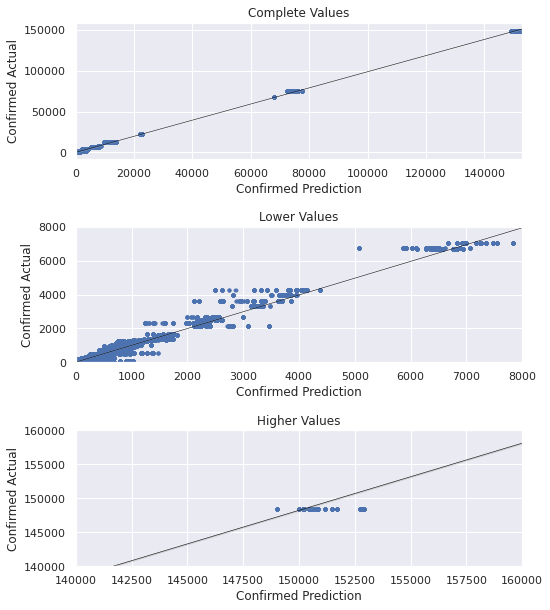

In [40]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.set(color_codes=True)
fig,axs = plt.subplots(nrows=3,figsize=(8,10))
axs[0].set_title('Complete Values')
axs[1].set_title('Lower Values')
axs[1].set_xlim(0,8000)
axs[1].set_ylim(0,8000)
axs[2].set_title('Higher Values')
axs[2].set_xlim(140000,160000)
axs[2].set_ylim(140000,160000)
plt.subplots_adjust(hspace=0.5)
sb.regplot(x=conf_pred, y=conf_actual, data=total_results, marker='.',color='b',ax=axs[0], line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=conf_pred, y=conf_actual, data=total_results, marker='.',color='b',ax=axs[1],line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=conf_pred, y=conf_actual, data=total_results, marker='.',color='b',ax=axs[2],line_kws={"lw": 0.5, "color": "black"},truncate=False)

Nos casos confirmados verifica-se bastante proximidade nos valores previstos e reais, nomeadamente quando a ordem de grandeza é mais baixa.

No entanto, existe algum ruído nos valores mais baixo, pelo que se repara que o modelo subestima a contagem dos casos confirmados.

Não obstante tudo o referido e tendo em conta que a maioria das previsões está bastante próxima da realidade, conclui-se que o modelo tenha uma boa previsão dos casos confirmados.

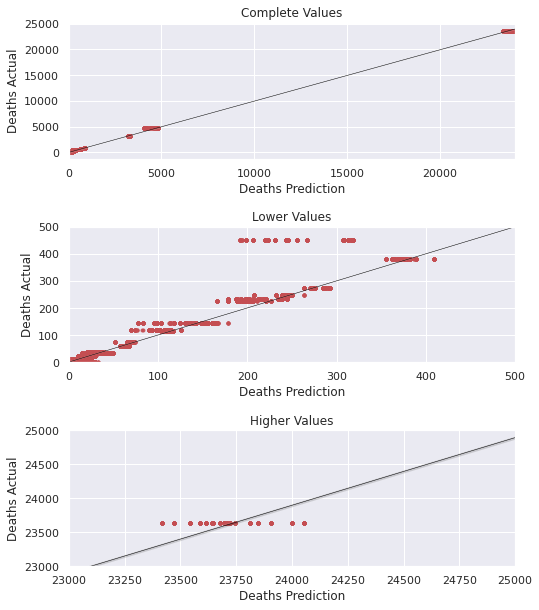

In [41]:
fig,axs = plt.subplots(nrows=3,figsize=(8,10))
axs[0].set_title('Complete Values')
axs[1].set_title('Lower Values')
axs[1].set_xlim(0,500)
axs[1].set_ylim(0,500)
axs[2].set_title('Higher Values')
axs[2].set_xlim(23000,25000)
axs[2].set_ylim(23000,25000)
plt.subplots_adjust(hspace=0.5)
sb.regplot(x=deaths_pred, y=deaths_actual, data=total_results, marker='.',color='r',ax=axs[0], line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=deaths_pred, y=deaths_actual, data=total_results, marker='.',color='r',ax=axs[1],line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=deaths_pred, y=deaths_actual, data=total_results, marker='.',color='r',ax=axs[2],line_kws={"lw": 0.5, "color": "black"},truncate=False)

Tal como tinha acontecido com os casos confirmados, verifica-se também o mesmo padrão com os óbitos por covid-19. Os resultados são muito bons com valores de grandeza mais baixa, e com valores de grandeza mais elevada, o erro acentua-se.

Verifica-se que existe uma maior dispersão das previsões com números de menor grandeza, o que não por si não representa um problema muito grande.

O desempenho da previsão do número de óbitos não foi tão satisfátoria quanto se esperaria, mas aceitável com valores mais baixos.

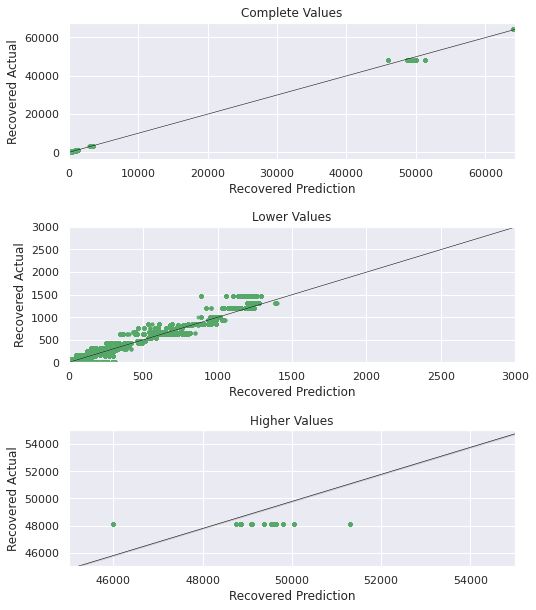

In [42]:
fig,axs = plt.subplots(nrows=3,figsize=(8,10))
axs[0].set_title('Complete Values')
axs[1].set_title('Lower Values')
axs[1].set_xlim(0,3000)
axs[1].set_ylim(0,3000)
axs[2].set_title('Higher Values')
axs[2].set_xlim(45000,55000)
axs[2].set_ylim(45000,55000)
plt.subplots_adjust(hspace=0.5)
sb.regplot(x=recovered_pred, y=recovered_actual, data=total_results, marker='.',color='g',ax=axs[0], line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=recovered_pred, y=recovered_actual, data=total_results, marker='.',color='g',ax=axs[1],line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=recovered_pred, y=recovered_actual, data=total_results, marker='.',color='g',ax=axs[2],line_kws={"lw": 0.5, "color": "black"},truncate=False)

A previsão do número de recuperados mantém a tendência verificada na análise das duas outras variáveis.

Os valores mais baixos estão relativamente perto do valor real, com alguma dispersão associada.

Os valores mais elevado, por outro lado, tendem a afastar se mais dos valores reais, verificando-se resultados mais desapontantes.

Estes resultantes verificam-se piores que os restantes observados, mas ainda assim não prejudicam severamente o desempenho do regressor.

### Conclusões KNN

O modelo de regressão teve muito bons resultados na sua generalidade. Certas parametrizações permitiram tirar maior partido do algoritmo e obter melhores resultados.

As previsões de casos confirmados e mortes foram satisfatórias, sendo que as previsões de casos recuperados obtiveram os piores resultados.

Em relação aos tempos de execução estes foram bastante pequenos, pelo que o maior tempo despendido foi no pré-processamento do dataset e na execução total do regressor (todas as combinações), daí que tornou-se pouco relevante analisar comparativamente estes dados. 

De forma geral o algoritmo KNN para regressão funcionou bem para o dataset disponível pelo que estamos satisfeitos com os resultados obtidos.


## Random Forest 

De forma semelhante ao algoritmo anterior, vamos avaliar os erros obtidos, bem como o valor do coeficiente de determinação R². É de relembrar que quanto melhor forem os modelos maior será o valor de R² (1 é o ideal).

Como as combinações são muito grandes (144), vamos primeiro filtrar as opções para o top 5 de cada categoria. Isto é, as combinações que obtiveram melhores resultados no MSE (erro quadrático médio), MAE (erro absoluto médio), R² e tempo.

Posteriormente, analisaremos graficamente os resultados obtidos.

In [ ]:
mse_top = [None]*5
mae_top = [None]*5
time_top = [None]*5
r2_top = [None]*5

max_mse = 0
max_mae = 0
max_time = 0
min_r2 = None
for result in results_rf:
    updateMSE(result)
    updateMAE(result)
    updateR2(result)
    updatetime(result)
    if result["mse"] > max_mse:
        max_mse = result["mse"]
    if result["mae"] > max_mae:
        max_mae = result["mae"]
    if result["time"] > max_time:
        max_time = result["time"]
    if min_r2 == None or result["r2"] < min_r2:
        min_r2 = result["r2"]
        
print("Filtered best results.\nMaximum MSE: {}\nMaximum MAE: {}\nMinimum R2: {} \nMaximum Time: {}".format(max_mse,max_mae,min_r2,max_time))


Agora que temos os melhores resultados, vamos tabelar as melhores combinações e verificar qual/quais se destacam ainda mais.

In [ ]:
top_data = set(tuple((top["params"],top["r2"],top["mse"],top["mae"],top["time"]) for top in mse_top))
top_data.update(set(tuple((top["params"],top["r2"],top["mse"],top["mae"],top["time"]) for top in mae_top)))
top_data.update(set(tuple((top["params"],top["r2"],top["mse"],top["mae"],top["time"]) for top in r2_top)))
top_data.update(set(tuple((top["params"],top["r2"],top["mse"],top["mae"],top["time"]) for top in time_top)))

ranking = pd.DataFrame(data=top_data,columns=['Combinations','R2','MSE','MAE','Time'])
ranking = ranking.sort_values(['R2','MSE','MAE','Time'],ascending=[False,True,True,True])
ranking  = ranking.reset_index()
del ranking['index']

with pd.ExcelWriter('covid19_rf_regressor_rank.xlsx') as writer:
    ranking.to_excel(writer)

ranking

Como se pode verificar, temos algumas combinações de parâmetros que se destacam. 

Ao nível do coeficiente R², todas obtiveram excelentes resultados, o que nos indica que as previsões obtidas se encontram bastante próximas dos dados reais ou seja, este modelo "ajusta-se" bem aos dados (**fitness**). 

Em relação ao erro absoluto médio, o mesmo se verifica, bons resultados na generalidade dos casos. 

Sendo assim, verifica-se que com **número de árvores** a **500** obtém-se melhores resultados. Relativamente ao **max_samples** ,ou seja, a percentagem da amostra de treino que é distribuida a cada árvore, os melhores resultados obtém-se com **0.5** e **0.25**. Para o número de features selecionado em cada ponto de divisão, **max_features** o melhor comportamento obtém-se com o valor **2**. Por fim **min_samples_split** que obteu melhores resultados foi genericamente o **2** apesar de numa combinação em particular o **4** ficou pela segunda posição no ranking. Relativamente aos tempos de execução verificamos que não existe grande diferenciação nos resultados obtidos.

Apesar de todas estas combinações aqui apresentadas serem muito boas, existe uma que supera todas as outras.
Com **números de árvores** a 500, **max_samples** a 0.5  e **max_features** e **min_samples_split** a 2.

### Representação dos Resultados

#### Comparação entre diferentes combinações e as suas relações com os valores reais

Para concluir sobre a generalidade do modelo de regressão com o algoritmo RandomForest, vamos apresentar um *regression plot* que para todos os resultados obtidos relacione cada variável dependente prevista e real. Isto é, comparar o rácio de casos confirmados, óbitos e recuperados, previstos e reais.

In [ ]:
total_results = results_rf[0]['data']
for i in range(1,len(results)):
    total_results = total_results.append(results_rf[i]['data'],ignore_index=True)
del total_results['Days Passed']
del total_results['Local']
total_results

conf_pred = total_results['Confirmed Prediction']
conf_actual = total_results['Confirmed Actual']
deaths_pred = total_results['Deaths Prediction']
deaths_actual = total_results['Deaths Actual']
recovered_pred = total_results['Recovered Prediction']
recovered_actual = total_results['Recovered Actual']

top_result_conf_pred = r2_top[0]['data']['Confirmed Prediction']
top_result_conf_actual = r2_top[0]['data']['Confirmed Actual']
top_result_deaths_pred = r2_top[0]['data']['Deaths Prediction']
top_result_deaths_actual = r2_top[0]['data']['Deaths Actual']
top_result_recovered_pred = r2_top[0]['data']['Recovered Prediction']
top_result_recovered_actual = r2_top[0]['data']['Recovered Actual']

##### Confirmados

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

sb.set(color_codes=True)
fig,axs = plt.subplots(nrows=3,figsize=(8,10))
axs[0].set_title('Complete Values')
axs[1].set_title('Lower Values')
axs[1].set_xlim(0,10000)
axs[1].set_ylim(0,10000)
axs[2].set_title('Higher Values')
axs[2].set_xlim(90000,140000)
axs[2].set_ylim(90000,140000)
plt.subplots_adjust(hspace=0.5)
sb.regplot(x=conf_pred, y=conf_actual, data=total_results, marker='.',color='b',ax=axs[0], line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=conf_pred, y=conf_actual, data=total_results, marker='.',color='r',ax=axs[1],line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=conf_pred, y=conf_actual, data=total_results, marker='.',color='r',ax=axs[2],line_kws={"lw": 0.5, "color": "black"})

##### Mortes

In [ ]:
sb.set(color_codes=True)
fig,axs = plt.subplots(nrows=3,figsize=(8,10))
axs[0].set_title('Complete Values')
axs[1].set_title('Lower Values')
axs[1].set_xlim(0,10000)
axs[1].set_ylim(0,10000)
axs[2].set_title('Higher Values')
axs[2].set_xlim(90000,140000)
axs[2].set_ylim(90000,140000)
plt.subplots_adjust(hspace=0.5)
sb.regplot(x=deaths_pred, y=deaths_actual, data=total_results, marker='.',color='b',ax=axs[0], line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=deaths_pred, y=deaths_actual, data=total_results, marker='.',color='r',ax=axs[1],line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=deaths_pred, y=deaths_actual, data=total_results, marker='.',color='r',ax=axs[2],line_kws={"lw": 0.5, "color": "black"})

##### Recuperados

In [ ]:
sb.set(color_codes=True)
fig,axs = plt.subplots(nrows=3,figsize=(8,10))
axs[0].set_title('Complete Values')
axs[1].set_title('Lower Values')
axs[1].set_xlim(0,10000)
axs[1].set_ylim(0,10000)
axs[2].set_title('Higher Values')
axs[2].set_xlim(90000,140000)
axs[2].set_ylim(90000,140000)
plt.subplots_adjust(hspace=0.5)
sb.regplot(x=recovered_pred, y=recovered_actual, data=total_results, marker='.',color='b',ax=axs[0], line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=recovered_pred, y=recovered_actual, data=total_results, marker='.',color='r',ax=axs[1],line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=recovered_pred, y=recovered_actual, data=total_results, marker='.',color='r',ax=axs[2],line_kws={"lw": 0.5, "color": "black"})

#### Análise do melhor resultado relativamente aos valores reais

Para concluir vamos análisar exatamente da mesma forma apenas o melhor valor obtido, para concluirmos sobre a discrepância dos resultados obtidos e dos reais

##### Confirmados

In [ ]:
sb.set(color_codes=True)
fig,axs = plt.subplots(nrows=3,figsize=(8,10))
axs[0].set_title('Complete Values')
axs[1].set_title('Lower Values')
axs[1].set_xlim(0,10000)
axs[1].set_ylim(0,10000)
axs[2].set_title('Higher Values')
axs[2].set_xlim(90000,140000)
axs[2].set_ylim(90000,140000)
plt.subplots_adjust(hspace=0.5)
sb.regplot(x=top_result_conf_pred, y=top_result_conf_actual, data=total_results, marker='.',color='b',ax=axs[0], line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=top_result_conf_pred, y=top_result_conf_actual, data=total_results, marker='.',color='r',ax=axs[1],line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=top_result_conf_pred, y=top_result_conf_actual, data=total_results, marker='.',color='r',ax=axs[2],line_kws={"lw": 0.5, "color": "black"})

##### Mortes

In [ ]:
sb.set(color_codes=True)
fig,axs = plt.subplots(nrows=3,figsize=(8,10))
axs[0].set_title('Complete Values')
axs[1].set_title('Lower Values')
axs[1].set_xlim(0,10000)
axs[1].set_ylim(0,10000)
axs[2].set_title('Higher Values')
axs[2].set_xlim(90000,140000)
axs[2].set_ylim(90000,140000)
plt.subplots_adjust(hspace=0.5)
sb.regplot(x=top_result_deaths_pred, y=top_result_deaths_actual, data=total_results, marker='.',color='b',ax=axs[0], line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=top_result_deaths_pred, y=top_result_deaths_actual, data=total_results, marker='.',color='r',ax=axs[1],line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=top_result_deaths_pred, y=top_result_deaths_actual, data=total_results, marker='.',color='r',ax=axs[2],line_kws={"lw": 0.5, "color": "black"})

##### Recuperados

In [ ]:
sb.set(color_codes=True)
fig,axs = plt.subplots(nrows=3,figsize=(8,10))
axs[0].set_title('Complete Values')
axs[1].set_title('Lower Values')
axs[1].set_xlim(0,10000)
axs[1].set_ylim(0,10000)
axs[2].set_title('Higher Values')
axs[2].set_xlim(90000,140000)
axs[2].set_ylim(90000,140000)
plt.subplots_adjust(hspace=0.5)
sb.regplot(x=top_result_recovered_pred, y=top_result_recovered_actual, data=total_results, marker='.',color='b',ax=axs[0], line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=top_result_recovered_pred, y=top_result_recovered_actual, data=total_results, marker='.',color='r',ax=axs[1],line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=top_result_recovered_pred, y=top_result_recovered_actual, data=total_results, marker='.',color='r',ax=axs[2],line_kws={"lw": 0.5, "color": "black"})

#### Conclusões RandomForest